In [1]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd

In [195]:
tr = pd.read_csv('training_data.csv').sample(frac=1, random_state=42)

In [199]:
tr = tr.rename(columns={'max_single_token_transfers': 'max_single_token_transfers_count'})

In [200]:
EXCLUDE_COLS = {'tx_hash', 'token_types', 'known_exploit', 'from_address', 'block_timestamp', 'outgoing_tx_timestamp'}
tr_cols = [col for col in tr.columns if col not in EXCLUDE_COLS]
tr_cols.sort()

X = tr[tr_cols] 
y = tr[EXCLUDE_COLS]

In [201]:
len(tr_cols)

45

In [202]:
tr_cols

['APE_transfers',
 'APE_value',
 'CRV_transfers',
 'CRV_value',
 'DAI_transfers',
 'DAI_value',
 'GALA_transfers',
 'GALA_value',
 'HEX_transfers',
 'HEX_value',
 'KOK_transfers',
 'KOK_value',
 'LINK_transfers',
 'LINK_value',
 'LOOKS_transfers',
 'LOOKS_value',
 'MANA_transfers',
 'MANA_value',
 'MATIC_transfers',
 'MATIC_value',
 'SAITAMA_transfers',
 'SAITAMA_value',
 'SAND_transfers',
 'SAND_value',
 'SHIB_transfers',
 'SHIB_value',
 'SOS_transfers',
 'SOS_value',
 'STRNGR_transfers',
 'STRNGR_value',
 'STRONG_transfers',
 'STRONG_value',
 'USDC_transfers',
 'USDC_value',
 'USDT_transfers',
 'USDT_value',
 'WBTC_transfers',
 'WBTC_value',
 'WETH_transfers',
 'WETH_value',
 'account_age_in_minutes',
 'max_single_token_transfers_count',
 'max_single_token_transfers_value',
 'tokens_type_counts',
 'transfer_counts']

In [203]:
clf = IsolationForest(random_state=42, n_estimators=100)
clf.fit(X.values)

IsolationForest(random_state=42)

In [204]:
exp = tr[tr['known_exploit']][tr_cols]
clf.predict(exp.values)

array([ 1, -1, -1, -1, -1,  1])

In [205]:
abs(clf.score_samples(exp.values))

array([0.41156891, 0.53253654, 0.66251176, 0.69479546, 0.57835294,
       0.36627534])

In [206]:
len(X.values)

14469

In [207]:
from collections import Counter

Counter(clf.predict(X.values))

Counter({1: 14413, -1: 56})

In [208]:
tr['pred'] = clf.predict(X.values)
tr['scores'] = abs(clf.score_samples(X.values))

In [209]:
pd.set_option('max_colwidth', None)

In [210]:
tr[tr['known_exploit']]

,tx_hash,transfer_counts,token_types,known_exploit,USDT_transfers,USDT_value,max_single_token_transfers_count,max_single_token_transfers_value,USDC_transfers,USDC_value,...,SOS_value,APE_transfers,APE_value,tokens_type_counts,from_address,block_timestamp,outgoing_tx_timestamp,account_age_in_minutes,pred,scores
8459,0x600373f67521324c8068cfd025f121a0843d57ec813411661b07edc5ff781842,8,"{'INV', 'WBTC', 'YFI', 'DOLA'}",True,0.0,0.000000e+00,2,1.777425e+03,0.0,0.000000e+00,...,0.0,0.0,0.0,4,0x117c0391b3483e32aa665b5ecb2cc539669ea7e9,2022-04-02 11:04:09+00:00,2022-04-02 10:52:05+00:00,12.066667,1,0.411569
8460,0x958236266991bc3fe3b77feaacea120f172c0708ad01c7a715b255f218f9313c,21,"{'DOLA', 'WBTC', '3CRV', 'USDT'}",True,7.0,3.317135e+08,9,1.619544e+05,0.0,0.000000e+00,...,0.0,0.0,0.0,4,0x7b792e49f640676b3706d666075e903b3a4deec6,2022-06-16 08:47:58+00:00,2022-06-16 08:47:50+00:00,0.133333,-1,0.532537
8457,0x2b023d65485c4bb68d781960c2196588d03b871dc9eb1c054f596b7ca6f7da56,25,"{'WETH', 'SUSD', 'USDT', 'USDC', 'DAI'}",True,2.0,3.060978e+06,11,1.493778e+08,8.0,8.058562e+07,...,0.0,0.0,0.0,5,0x63341ba917de90498f3903b199df5699b4a55ac0,2022-04-30 07:40:24+00:00,2022-04-30 07:38:34+00:00,1.833333,-1,0.662512
8456,0xcd314668aaa9bbfebaf1a0bd2b6553d01dd58899c508d4729fa7311dc5d33ad7,35,"{'WETH', 'USDT', '3CRV', 'USDC', 'BEAN', 'DAI', 'LUSD'}",True,5.0,6.134645e+08,7,2.075857e+09,7.0,2.075857e+09,...,0.0,0.0,0.0,7,0x1c5dcdd006ea78a7e4783f9e6021c32935a10fb4,2022-04-17 12:24:16+00:00,2022-04-16 08:36:52+00:00,1667.400000,-1,0.694795
8458,0xab486012f21be741c9e674ffda227e30518e8a1e37a5f1d58d0b0d41f6e76530,18,"{'USDC', 'WETH', 'USDT', 'FRAX'}",True,2.0,2.659198e+05,12,1.514289e+09,12.0,1.514289e+09,...,0.0,0.0,0.0,4,0x6162759edad730152f0df8115c698a42e666157f,2022-04-30 09:32:29+00:00,2022-04-30 07:51:39+00:00,100.833333,-1,0.578353
8461,0xe0b0c2672b760bef4e2851e91c69c8c0ad135c6987bbf1f43f5846d89e691428,14,{'RENA'},True,0.0,0.000000e+00,14,7.164060e+05,0.0,0.000000e+00,...,0.0,0.0,0.0,1,0xef967ece5322c0d7d26dab41778acb55ce5bd58b,2022-03-27 01:41:46+00:00,2022-03-27 01:10:05+00:00,31.683333,1,0.366275


In [211]:
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer(exp)

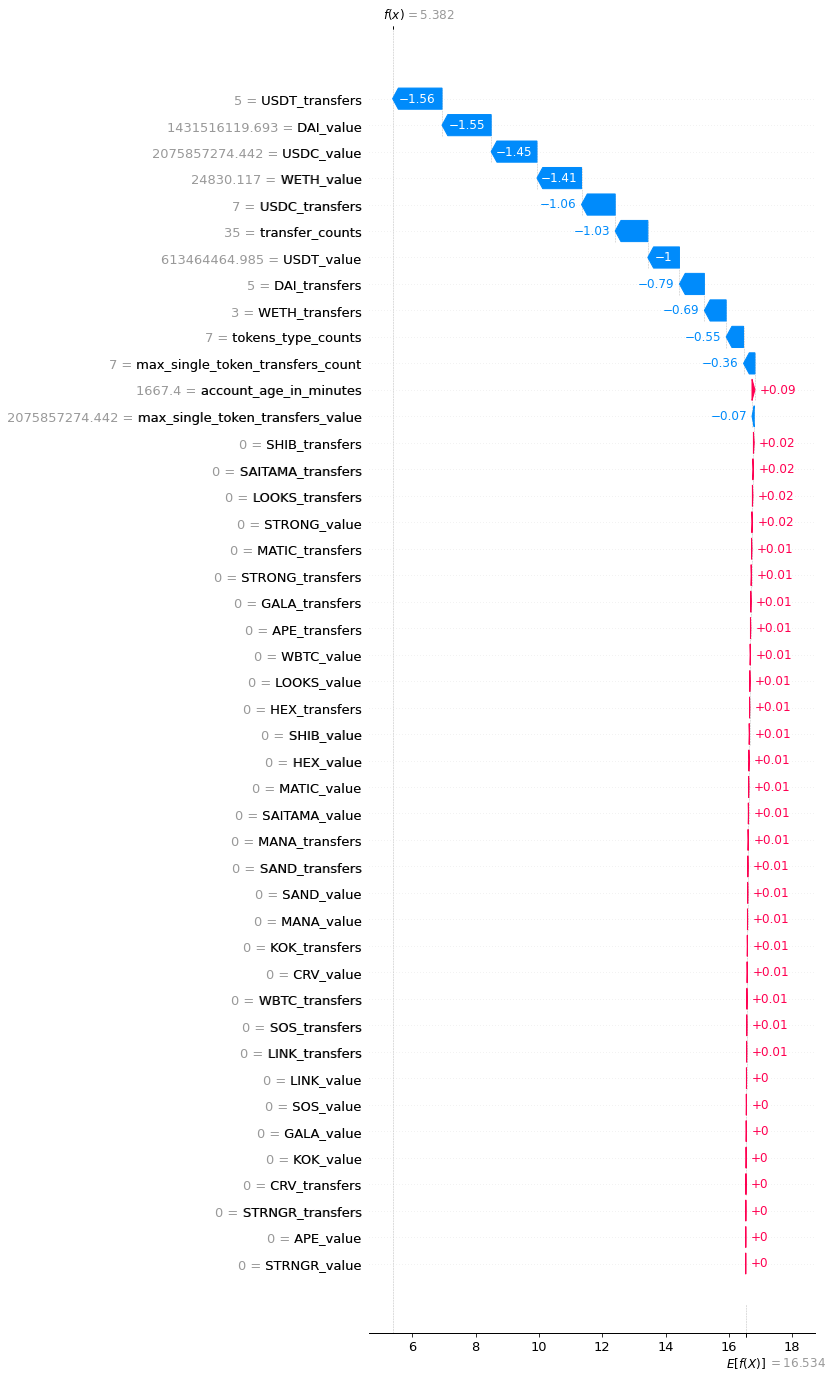

In [212]:
class helper_object():
    """
    This wraps the shap object.
    It takes as input i, which indicates the index of the observation to be explained.
    """
    def __init__(self, i):
        self.base_values = shap_values.base_values[i][0]
        self.data = exp.iloc[i]
        self.display_data = None
        self.feature_names = exp.columns.to_list()
        self.values = shap_values.values[i]

# visualize the sixth prediction's explanation using the workaround
shap.waterfall_plot(helper_object(3), len(shap_values[0]))

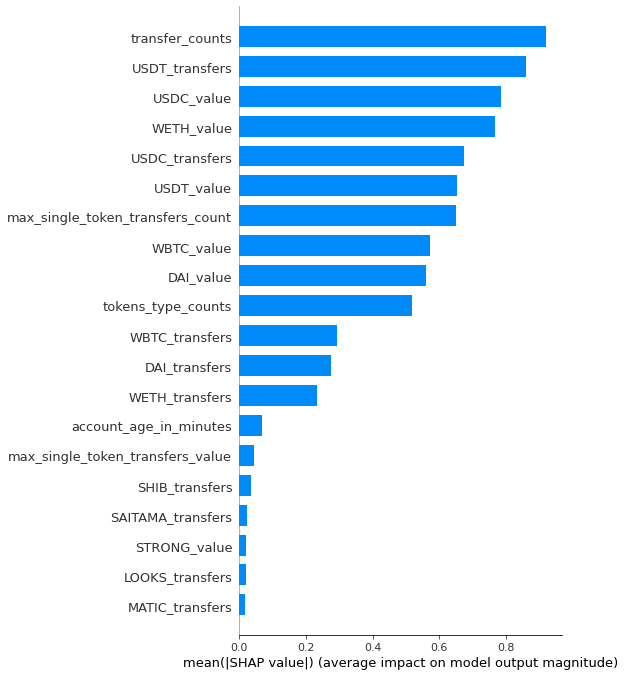

In [213]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [214]:
tr[tr["account_age_in_minutes"]==0]

,tx_hash,transfer_counts,token_types,known_exploit,USDT_transfers,USDT_value,max_single_token_transfers_count,max_single_token_transfers_value,USDC_transfers,USDC_value,...,SOS_value,APE_transfers,APE_value,tokens_type_counts,from_address,block_timestamp,outgoing_tx_timestamp,account_age_in_minutes,pred,scores
11497,0x9d502e0be04a38e7990aa33bd06ee102931f9c06b6ab9af7108453c142e55172,1,{'USDT'},False,1.0,6342.450746,1,6342.450746,0.0,0.000000,...,0.0,0.0,0.0,1,0x0fd41370b43bfe125d79d536eab4ec185eece4cb,2022-06-16 20:00:19+00:00,2022-06-16 20:00:19+00:00,0.0,1,0.311117
13287,0x281d8af7a898422af3d4689e105ea146e2522d5dd3aad2e9645a2894618dc288,1,{'USDC'},False,0.0,0.000000,1,285.850000,1.0,285.850000,...,0.0,0.0,0.0,1,0x2ace93c6c3166051510562bb651986425a6c98bd,2022-06-10 01:14:45+00:00,2022-06-10 01:14:45+00:00,0.0,1,0.312007
1078,0xf47ec7baafaf1306c243243251de89bc0520d0a43482bf5c5b11d339e15f415e,4,"{'MATIC', 'WETH'}",False,0.0,0.000000,2,0.007930,0.0,0.000000,...,0.0,0.0,0.0,2,0xa5a1a6e27d84e05a6bcd1ac55a1a6812bf7ad9d4,2022-04-05 13:12:34+00:00,2022-04-05 13:12:34+00:00,0.0,1,0.355401
10029,0x196eb82b0c66312b290e75356baf7daaa627095dffd7b4632ff5552d4458f370,1,{'GALA'},False,0.0,0.000000,1,4905.000000,0.0,0.000000,...,0.0,0.0,0.0,1,0xe751d85c26885a652dc075d9187b1a42ab365d2c,2022-02-06 11:52:53+00:00,2022-02-06 11:52:53+00:00,0.0,1,0.377266
4745,0x160928906d6d37a94edfc07e9ed1e4e24b69a34c62b84c67d43fc21aebba9523,3,"{'WOOL', 'WETH'}",False,0.0,0.000000,2,0.600000,0.0,0.000000,...,0.0,0.0,0.0,2,0xc6ca4f6a75a2f77269587cbe440de27fff272554,2022-01-09 08:39:55+00:00,2022-01-09 08:39:55+00:00,0.0,1,0.310974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,0xce7beb12c8a0be25b6ce969fdebb2c9ea226d89f21a35a47d0d7065b639fe30a,3,"{'WETH', 'WLITI'}",False,0.0,0.000000,2,0.055000,0.0,0.000000,...,0.0,0.0,0.0,2,0xe845ade012f14918b9fa6ea53773228486a8ad8b,2022-02-09 14:25:55+00:00,2022-02-09 14:25:55+00:00,0.0,1,0.310974
11016,0xb87b2d98d6808685a46ed2ba9c7fae01e069b0c6f88b40d78a19fdb6383481b1,1,{'UNI'},False,0.0,0.000000,1,22.060155,0.0,0.000000,...,0.0,0.0,0.0,1,0x7129d7fd847609ad70f112d00eab7f80dc5df2c8,2022-06-22 15:11:51+00:00,2022-06-22 15:11:51+00:00,0.0,1,0.302575
11363,0xb5c6879af93fcae1abea049ab0b6747c7ac3b6e723b3209f3d7920be24336564,1,{'USDC'},False,0.0,0.000000,1,388.778177,1.0,388.778177,...,0.0,0.0,0.0,1,0x7f2010b7871f2a113e1364f5f628a91c53dbd4da,2022-01-09 22:23:43+00:00,2022-01-09 22:23:43+00:00,0.0,1,0.312007
4426,0x404666af36d5f2e11f763391be0a5b40ae78dfd4304b4f22e3a53c369e779bf1,1,{'USDT'},False,1.0,1700.000000,1,1700.000000,0.0,0.000000,...,0.0,0.0,0.0,1,0x1b4006139cfd127822ff9b26a0f89532977b3a42,2022-06-16 18:19:17+00:00,2022-06-16 18:19:17+00:00,0.0,1,0.311117


<AxesSubplot:ylabel='Frequency'>

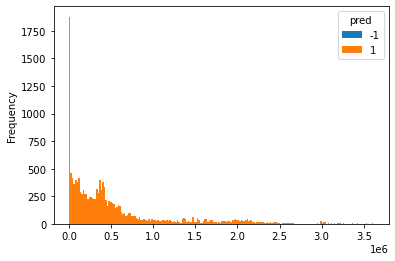

In [215]:
tr.pivot(columns="pred", values="account_age_in_minutes").plot.hist(bins=200)

<AxesSubplot:>

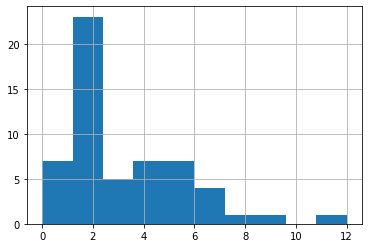

In [216]:
tr[tr['pred']==-1]['USDC_transfers'].hist()

<AxesSubplot:>

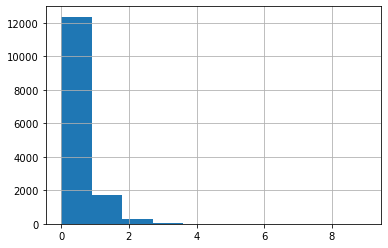

In [217]:
tr[tr['pred']==1]['USDC_transfers'].hist()

In [223]:
tr[(tr['transfer_counts'] > 5) & (tr['max_single_token_transfers_count']==tr['transfer_counts'])]

,tx_hash,transfer_counts,token_types,known_exploit,USDT_transfers,USDT_value,max_single_token_transfers_count,max_single_token_transfers_value,USDC_transfers,USDC_value,...,APE_transfers,APE_value,tokens_type_counts,from_address,block_timestamp,outgoing_tx_timestamp,account_age_in_minutes,pred,scores,> 0.6
608,0x1ec1e21d650d289a1cca3f18162018efcb439a5b4d500ef59c6eeeceb60c5b88,25,{'STRONG'},False,0.0,0.0,25,11.191329,0.0,0.0,...,0.0,0.0,1,0x9fccd8718d822445c7ff692d24b069e6ad253ff8,2022-02-21 10:07:19+00:00,2021-07-07 01:38:00+00:00,330269.316667,1,0.447745,False
3546,0xe7c9f0b99526c2fd78051064bcf3095e5196fa2c688b25d659cc73588ad8cccf,15,{'STRONG'},False,0.0,0.0,15,10.751571,0.0,0.0,...,0.0,0.0,1,0x36bbaf59bebafc29dc891aaccc933e7f8be6bb35,2022-02-20 11:44:31+00:00,2022-01-11 21:34:02+00:00,57010.483333,1,0.446810,False
4096,0xbf05f0078e4021ac99588685076148ad9577f30e0c381f4d5faf5bfb83833c5f,7,{'WETH'},False,0.0,0.0,7,1250.000000,0.0,0.0,...,0.0,0.0,1,0x116a4ea2f3d2a1c41c82d88df87416d070b5d94e,2022-02-05 08:50:52+00:00,2021-09-12 19:08:59+00:00,209621.883333,1,0.404741,False
173,0x1d7cfa24ae43aa3109d11303c8766dc3ea6aa7d1daaeb78b0559eea5cc294d98,10,{'STRONG'},False,0.0,0.0,10,8.102143,0.0,0.0,...,0.0,0.0,1,0x63d1277b25710bfeb1e95085262f365a5cc8dfaf,2022-04-05 08:24:35+00:00,2020-10-31 16:23:13+00:00,749761.366667,1,0.407287,False
7300,0x52a9007ccbb0c3827c665be833ec31d9ea042bfd1c301eb1b044daa4f1db71b8,15,{'STRONG'},False,0.0,0.0,15,8.552571,0.0,0.0,...,0.0,0.0,1,0x050e1d31d8911a5b9b9164cec9b5c879dc00eb1c,2022-02-20 12:07:24+00:00,2021-07-16 09:11:21+00:00,315536.050000,1,0.437726,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,0x7a383b4deeec6fd1c93141e031f903b199636949d9a3a8edad36523817ad51fa,51,{'STRNGR'},False,0.0,0.0,51,155.199900,0.0,0.0,...,0.0,0.0,1,0xad430401369db3eaff6d67136d8343e6368a8979,2022-04-26 02:04:08+00:00,2021-02-19 06:41:38+00:00,620362.500000,1,0.407746,False
3766,0x57923650ef96b3bdfceaaf14d002f60933fea4c52f18669d5a6dd7d0f9496862,10,{'STRONG'},False,0.0,0.0,10,15.121760,0.0,0.0,...,0.0,0.0,1,0x5b2328c3ae704e3125c4478f2d0f575ebc3e7e95,2022-01-23 01:32:51+00:00,2021-01-17 12:37:33+00:00,533575.300000,1,0.422307,False
12784,0x711b504add9217b56c9b49109a9268acef85f01775dbfe0ae58d964e706b8f30,23,{'STRONG'},False,0.0,0.0,23,15.798457,0.0,0.0,...,0.0,0.0,1,0x1fcc4ed9ce17403c0859f083490aa5d05b8b1bf1,2022-02-06 06:23:05+00:00,2021-01-16 02:07:46+00:00,556095.316667,1,0.453830,False
7022,0xc97c7c906da9261f1cb14dab33928264f7481f66d71858255539e4f86fdf0815,11,{'STRONG'},False,0.0,0.0,11,10.237214,0.0,0.0,...,0.0,0.0,1,0xff740e93fc505b7a41a14f4e199b58dfaaa7c738,2022-02-06 11:58:05+00:00,2021-08-09 17:33:59+00:00,260304.100000,1,0.413805,False


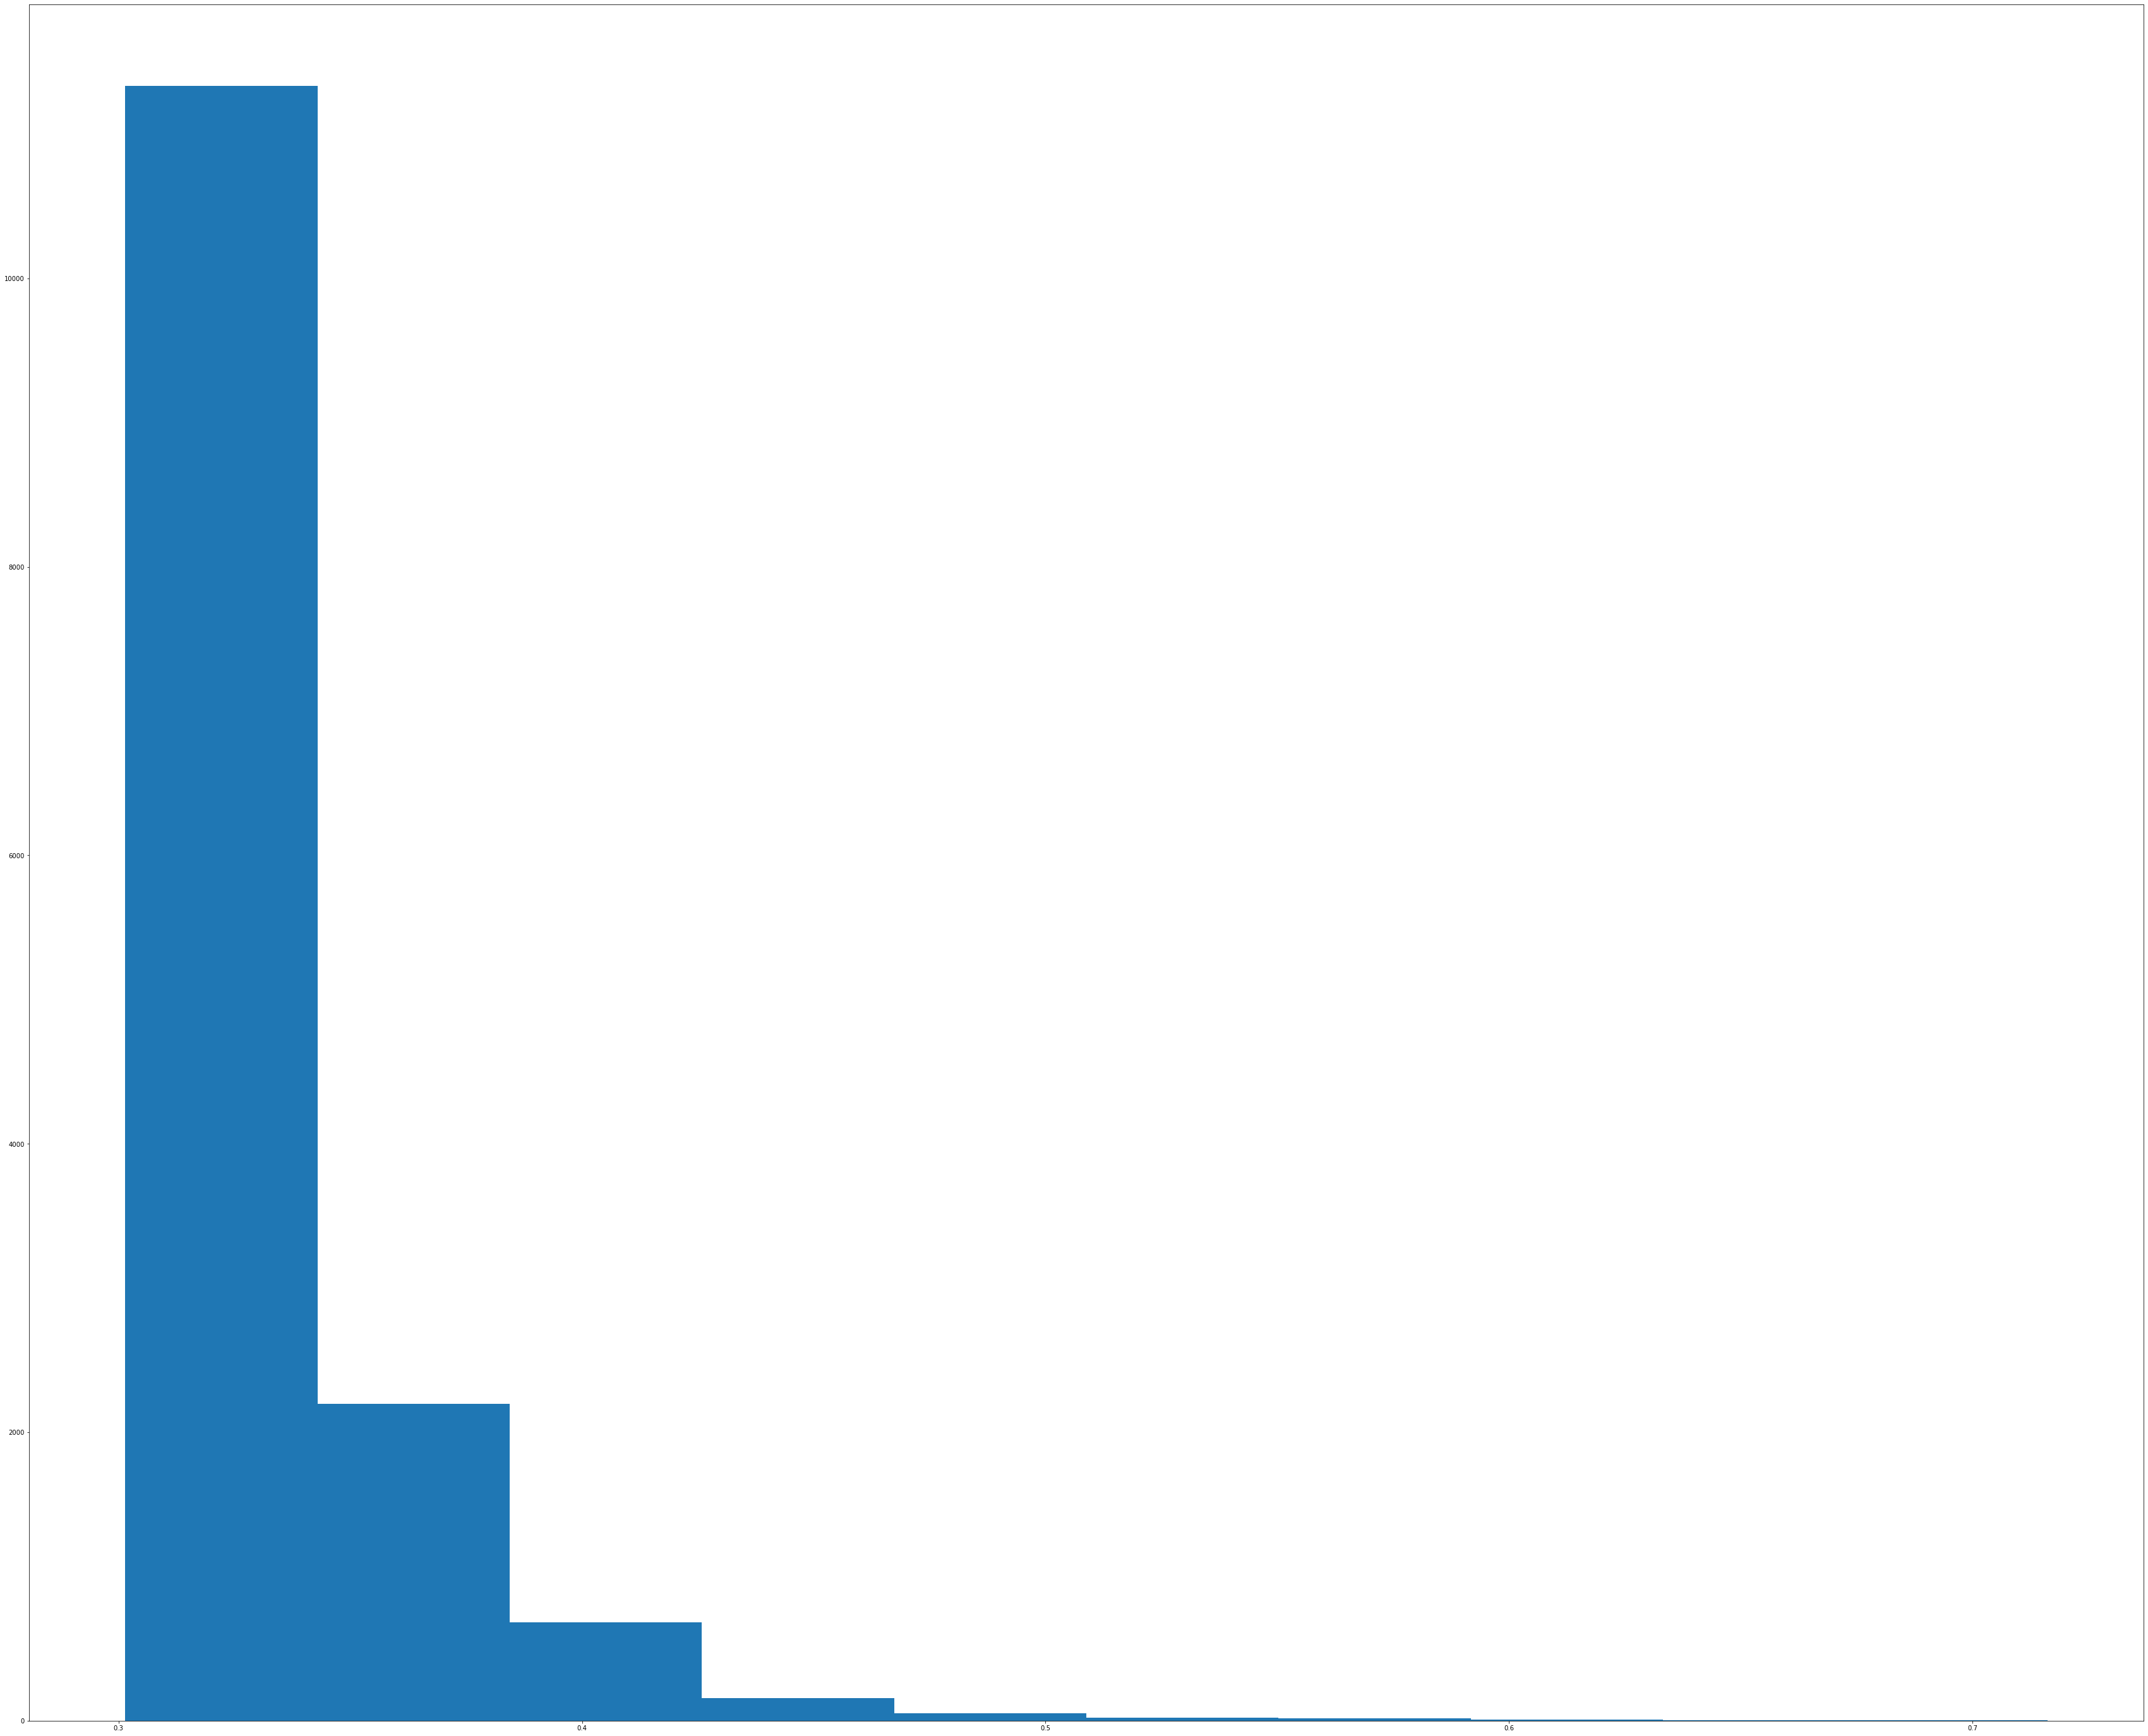

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(60,50))
plt.hist(tr["scores"])

plt.show()

In [220]:
tr['> 0.6'] = tr['scores'] > 0.6
tr['> 0.6'].value_counts()

False    14459
True        10
Name: > 0.6, dtype: int64

In [221]:
tr[tr['> 0.6']]

,tx_hash,transfer_counts,token_types,known_exploit,USDT_transfers,USDT_value,max_single_token_transfers_count,max_single_token_transfers_value,USDC_transfers,USDC_value,...,APE_transfers,APE_value,tokens_type_counts,from_address,block_timestamp,outgoing_tx_timestamp,account_age_in_minutes,pred,scores,> 0.6
3184,0xea8adb9dc9a80ab62e498fce6f22cf776ac185db6191d8bf2311c7b2dba9d3e4,17,"{'USDC', 'WETH', 'USDT'}",False,6.0,4.520777e+06,6,4.520777e+06,6.0,2.269244e+06,...,0.0,0.0,3,0x73f7092510e44915cb177684db7b1f101aeecb8d,2022-04-27 03:02:35+00:00,2021-11-12 15:08:03+00:00,2.383145e+05,-1,0.626026,True
10771,0xf380e7f1d010372cd48fe1d474eb6b7a6010f795e2060279b59c875b2d019ca6,25,"{'WETH', 'USDT', 'USDC', 'WBTC', 'BNT', 'LINK'}",False,5.0,1.063526e+05,6,4.794000e+03,4.0,1.423496e+04,...,0.0,0.0,6,0x67a6b352b5e32551d074f8137f8abd0c23eb84f1,2022-02-20 04:39:17+00:00,2020-11-13 09:01:41+00:00,6.678976e+05,-1,0.621543,True
11254,0xf123258de305971b44656f654d5112d3084592f66e4d96b1b7a7647345183969,23,"{'USDC', 'WBTC', 'WETH', 'APE'}",False,0.0,0.000000e+00,7,2.000000e+04,7.0,5.342204e+05,...,7.0,20000.0,4,0x69bab6810fa99475854bca0a3dd72ae6a0728ece,2022-04-26 23:25:52+00:00,2020-10-29 01:34:21+00:00,7.846715e+05,-1,0.608797,True
5937,0x39f7acf6eca06d32fed034185ec2ed7b95d510bc5c85676f4d4e5fbaf4194d58,30,"{'USDC', 'WETH', 'DAI', 'USDT', 'WBTC'}",False,5.0,3.817965e+05,11,7.629517e+02,9.0,1.906637e+06,...,0.0,0.0,5,0xa7d20f01e60a984ae92b5a18a591181945460d18,2022-06-16 20:16:25+00:00,2022-03-12 12:00:21+00:00,1.387361e+05,-1,0.716194,True
8331,0xcc8f841cda3e4f689e38527ec10139fa5dfefd62ae8114bc344a537369a8739a,14,"{'USDC', 'WETH', 'USDT', 'SHIB'}",False,4.0,5.416151e+05,5,1.617402e+02,2.0,3.241632e+05,...,0.0,0.0,4,0x2e358d7a59704cf629cd73384b16b67b52665ec5,2022-01-09 15:01:06+00:00,2021-02-02 16:32:58+00:00,4.909481e+05,-1,0.648174,True
8457,0x2b023d65485c4bb68d781960c2196588d03b871dc9eb1c054f596b7ca6f7da56,25,"{'WETH', 'SUSD', 'USDT', 'USDC', 'DAI'}",True,2.0,3.060978e+06,11,1.493778e+08,8.0,8.058562e+07,...,0.0,0.0,5,0x63341ba917de90498f3903b199df5699b4a55ac0,2022-04-30 07:40:24+00:00,2022-04-30 07:38:34+00:00,1.833333e+00,-1,0.662512,True
8456,0xcd314668aaa9bbfebaf1a0bd2b6553d01dd58899c508d4729fa7311dc5d33ad7,35,"{'WETH', 'USDT', '3CRV', 'USDC', 'BEAN', 'DAI', 'LUSD'}",True,5.0,6.134645e+08,7,2.075857e+09,7.0,2.075857e+09,...,0.0,0.0,7,0x1c5dcdd006ea78a7e4783f9e6021c32935a10fb4,2022-04-17 12:24:16+00:00,2022-04-16 08:36:52+00:00,1.667400e+03,-1,0.694795,True
9419,0x18a1f059cc44baa3c7e3fa7eb964b8eb35d851c91f5fd79c22f70625bbb666e5,12,"{'USDC', 'WETH', 'USDT', 'DAI'}",False,2.0,1.949477e+05,4,2.787500e+02,4.0,8.426467e+05,...,0.0,0.0,4,0x58c6d652e07f7ffdd1e834ef16163a8d0c710895,2022-02-05 17:49:34+00:00,2020-01-13 02:41:57+00:00,1.086668e+06,-1,0.630407,True
10534,0xbf25f687ca59a9914278e1be45f30ce0772477edf312e9f39d764cff03f541c1,11,"{'USDC', 'WETH', 'DAI', 'USDT'}",False,5.0,3.777179e+06,5,3.777179e+06,2.0,1.333882e+06,...,0.0,0.0,4,0xee6752ec7a4017229d7757154563062849a1dfe1,2022-01-05 10:32:49+00:00,2022-01-04 19:20:56+00:00,9.118833e+02,-1,0.619378,True
11612,0x346349131908987cdf9555601e6f8c377b0ae1f68b240fb290d9f03d8de0cc85,22,"{'USDC', 'WETH', 'USDT', 'DAI'}",False,2.0,3.568090e+04,10,5.170117e+02,6.0,8.948437e+05,...,0.0,0.0,4,0xea92affeef270a0d9a51b5172a5948c3eb7c1ed8,2022-04-26 15:03:17+00:00,2021-12-22 10:37:07+00:00,1.802662e+05,-1,0.635488,True


In [224]:
import pickle

with open('isolation_forest.pkl','wb') as f:
    pickle.dump(clf, f)

In [346]:
# load
with open('isolation_forest.pkl', 'rb') as f:
    clf2 = dill.load(f)

In [226]:
input_data = [[1]*45]
clf.predict(input_data)

array([-1])

In [227]:
import lime.lime_tabular
import numpy as np

In [328]:
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=tr_cols, class_names=['NORMAL', 'ANOMALY'], discretize_continuous=True, random_state=42,
                                                   discretizer='entropy', training_labels=tr['known_exploit'].values)

In [229]:
tr_cols

['APE_transfers',
 'APE_value',
 'CRV_transfers',
 'CRV_value',
 'DAI_transfers',
 'DAI_value',
 'GALA_transfers',
 'GALA_value',
 'HEX_transfers',
 'HEX_value',
 'KOK_transfers',
 'KOK_value',
 'LINK_transfers',
 'LINK_value',
 'LOOKS_transfers',
 'LOOKS_value',
 'MANA_transfers',
 'MANA_value',
 'MATIC_transfers',
 'MATIC_value',
 'SAITAMA_transfers',
 'SAITAMA_value',
 'SAND_transfers',
 'SAND_value',
 'SHIB_transfers',
 'SHIB_value',
 'SOS_transfers',
 'SOS_value',
 'STRNGR_transfers',
 'STRNGR_value',
 'STRONG_transfers',
 'STRONG_value',
 'USDC_transfers',
 'USDC_value',
 'USDT_transfers',
 'USDT_value',
 'WBTC_transfers',
 'WBTC_value',
 'WETH_transfers',
 'WETH_value',
 'account_age_in_minutes',
 'max_single_token_transfers_count',
 'max_single_token_transfers_value',
 'tokens_type_counts',
 'transfer_counts']

In [230]:
exp

,APE_transfers,APE_value,CRV_transfers,CRV_value,DAI_transfers,DAI_value,GALA_transfers,GALA_value,HEX_transfers,HEX_value,...,USDT_value,WBTC_transfers,WBTC_value,WETH_transfers,WETH_value,account_age_in_minutes,max_single_token_transfers_count,max_single_token_transfers_value,tokens_type_counts,transfer_counts
8459,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,...,0.000000e+00,2.0,188.061436,0.0,0.000000,12.066667,2,1.777425e+03,4,8
8460,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,...,3.317135e+08,9.0,161954.388931,0.0,0.000000,0.133333,9,1.619544e+05,4,21
8457,0.0,0.0,0.0,0.0,2.0,3.621447e+06,0.0,0.0,0.0,0.0,...,3.060978e+06,0.0,0.000000,2.0,6751.345801,1.833333,11,1.493778e+08,5,25
8456,0.0,0.0,0.0,0.0,5.0,1.431516e+09,0.0,0.0,0.0,0.0,...,6.134645e+08,0.0,0.000000,3.0,24830.116910,1667.400000,7,2.075857e+09,7,35
8458,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,...,2.659198e+05,0.0,0.000000,2.0,100000.000000,100.833333,12,1.514289e+09,4,18
8461,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.000000,0.0,0.000000,31.683333,14,7.164060e+05,1,14


In [231]:
input_data = tr[tr['tx_hash']=='0x39f7acf6eca06d32fed034185ec2ed7b95d510bc5c85676f4d4e5fbaf4194d58'][tr_cols].values[0]

In [353]:
input_data.shape

(45,)

In [356]:
def prediction_func(x):
    scores = abs(clf.score_samples(x))
    class_probabilities = np.array([[1 - score, score] for score in scores])
    
    return class_probabilities

In [357]:
explanation = explainer.explain_instance(input_data, prediction_func, num_features=10)

In [358]:
abs(clf.score_samples(input_data.reshape(1,-1)))

array([0.71619352])

In [311]:
tr[tr['tx_hash']=='0x39f7acf6eca06d32fed034185ec2ed7b95d510bc5c85676f4d4e5fbaf4194d58'][tr_cols]

,APE_transfers,APE_value,CRV_transfers,CRV_value,DAI_transfers,DAI_value,GALA_transfers,GALA_value,HEX_transfers,HEX_value,...,USDT_value,WBTC_transfers,WBTC_value,WETH_transfers,WETH_value,account_age_in_minutes,max_single_token_transfers_count,max_single_token_transfers_value,tokens_type_counts,transfer_counts
5937,0.0,0.0,0.0,0.0,2.0,381327.315906,0.0,0.0,0.0,0.0,...,381796.49282,3.0,18.088846,11.0,762.951675,138736.066667,11,762.951675,5,30


In [359]:
str(explanation.as_list())

"[('8.50 < USDC_transfers <= 10.50', 0.13049207218313966), ('4.50 < USDT_transfers <= 6.50', 0.07129965352301262), ('HEX_value <= 0.60', -0.06079853080749097), ('MATIC_value <= 0.14', -0.057254959871199086), ('SHIB_value <= 10.00', -0.055596425051996586), ('SAITAMA_value <= 0.01', -0.05458310778223937), ('APE_transfers <= 0.50', -0.0516256583031901), ('SHIB_transfers <= 0.50', -0.05093509907393855), ('GALA_transfers <= 0.50', -0.04712318850414175), ('STRONG_value <= 0.07', -0.04495718110298518)]"

In [360]:
[str(x) for x in explanation.as_list()]

["('8.50 < USDC_transfers <= 10.50', 0.13049207218313966)",
 "('4.50 < USDT_transfers <= 6.50', 0.07129965352301262)",
 "('HEX_value <= 0.60', -0.06079853080749097)",
 "('MATIC_value <= 0.14', -0.057254959871199086)",
 "('SHIB_value <= 10.00', -0.055596425051996586)",
 "('SAITAMA_value <= 0.01', -0.05458310778223937)",
 "('APE_transfers <= 0.50', -0.0516256583031901)",
 "('SHIB_transfers <= 0.50', -0.05093509907393855)",
 "('GALA_transfers <= 0.50', -0.04712318850414175)",
 "('STRONG_value <= 0.07', -0.04495718110298518)"]

In [361]:
explanation.show_in_notebook()

In [347]:
import dill

with open('model_explainer.pkl', 'wb') as f:
    dill.dump(explainer, f)